Devanagari Handwritten Character Dataset Data Set 

Number of instances: 92k
Number of attributes: 1024, integer

Abstract: 
This is an image database of Handwritten Devanagari characters. There are 46 classes of characters with 2000 examples each. The dataset is split into training set(85%) and testing set(15%).

Source:
The dataset was created by extraction and manual annotation of thousands of characters from handwritten documents. 
Creator Name: Shailesh Acharya, Email: sailes437 '@' gmail.com, Institution: University of North Texas, Cell: +19402200157 
Creator Name: Prashnna Kumar Gyawali, Email: gyawali.prasanna '@' gmail.com, Institution: Rochester Institute of Technology

Data Set Information:
Data Type: GrayScale Image 
The image dataset can be used to benchmark classification algorithm for OCR systems. The highest accuracy obtained in the Test set is 98.47%. Model Description is available in the paper [Web Link] 
More information on the dataset at [Web Link]. 

Attribute Information:
Image Format: .png 
Resolution: 32 by 32 
Actual character is centered within 28 by 28 pixel, padding of 2 pixel is added on all four sides of actual character.

Citation Request:
The material maybe used for free with the following paper cited, 
S. Acharya, A.K. Pant and P.K. Gyawali â€œDeep Learning Based Large Scale Handwritten Devanagari Character Recognitionâ€,In Proceedings of the 9th International Conference on Software, Knowledge, Information Management and Applications (SKIMA), pp. 121-126, 2015.

https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset#

In [1]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

In [2]:
# Function to read csv file
# load data_array
def read_file(filename):
    line_count = 0
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        line1 = line.rstrip()
        line_split=line1.split(",")
        data_array.append(line_split)
    return data_array

In [3]:
# read csv file into training data array by calling read_file
# set X2 attributes to all rows, columns 0 to 1024
# set y2 outcome to all rows, column 0 
train_images = read_file("dev_Train.csv")
print ("readfile")
dataset = np.array(train_images)
print ("dataset")
X2 = dataset[:,1:1025]
print ("X2")
y2 = dataset[:,0]
print ("y2")

readfile
dataset
X2
y2


In [4]:
# reclassify data type to int
X = X2.astype(np.int)
y = y2.astype(np.int)
print(X.shape)
print(y.shape)

(78200, 1024)
(78200,)


In [5]:
# Not using X2 and y2; delete and run garbage collection
del [[X2,y2]]
gc.collect()

0

In [6]:
# read csv file into test data array by calling read_file
# set X2_test attributes to all rows, columns 1 to 1024
# set y2_test outcome to all rows, column 0 

test_images = read_file("dev_Test.csv")
print ("readfile")
dataset = np.array(test_images)
print ("dataset")
X2_test = dataset[:,1:1025]
print ("X2test")
y2_test = dataset[:,0]
print ("y2test")

readfile
dataset
X2test
y2test


In [7]:
# reclassify data type to int
X_test = X2_test.astype(np.int)
y_test = y2_test.astype(np.int)
print(X_test.shape)
print(y_test.shape)

(13800, 1024)
(13800,)


In [8]:
# Not using X2_test and y2_test; make it minimum
del [[X2_test,y2_test]]
print('del')
gc.collect()
print('gc')

del
gc


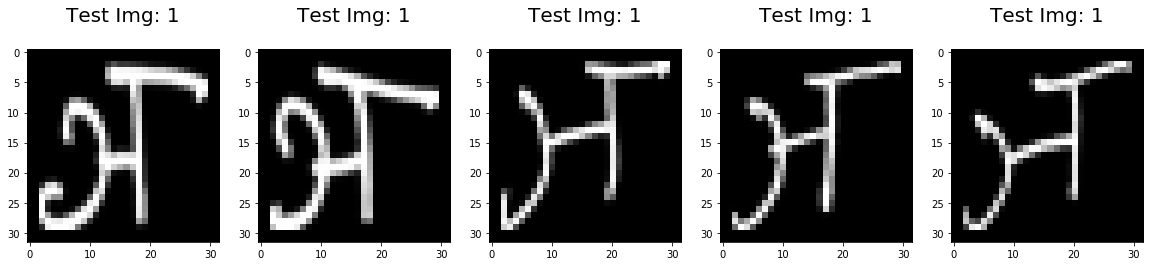

In [9]:
# show the first 5 test images
# plt.figure(figsize=(width",height"))
# enumerate 2 lists equal length simultaneously: enumerate(zip
# subplot (nrows, ncols, index) - plot within plot where index is the placement
# imshow (array(m,n scalar), cmap=colormap)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (32,32)), cmap=plt.cm.gray)
    plt.title('Test Img: %i\n' % label, fontsize = 20)

In [10]:
## Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          1       0.64      0.65      0.64       300
          2       0.82      0.68      0.74       300
          3       0.68      0.68      0.68       300
          4       0.78      0.23      0.35       300
          5       0.65      0.55      0.59       300
          6       0.69      0.42      0.52       300
          7       0.51      0.61      0.55       300
          8       0.61      0.24      0.34       300
          9       0.64      0.41      0.50       300
         10       0.45      0.53      0.48       300
         11       0.73      0.57      0.64       300
         12       0.30      0.35      0.32       300
         13       0.33      0.62      0.43       300
         14       0.41      0.69      0.52       300
         15       0.41      0.30      0.35       300
         16       0.82      0.41      0.55       300
         17       0.50      0.29      0.36       300
         18       0.4

# note: this may take a while!!
# Knn- classification
# k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [11]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          1       0.67      0.70      0.69       300
          2       0.76      0.71      0.73       300
          3       0.71      0.73      0.72       300
          4       0.56      0.59      0.58       300
          5       0.67      0.64      0.66       300
          6       0.57      0.60      0.58       300
          7       0.72      0.72      0.72       300
          8       0.49      0.50      0.49       300
          9       0.51      0.52      0.52       300
         10       0.50      0.50      0.50       300
         11       0.66      0.58      0.61       300
         12  

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs',random_state=10)
model.fit(X,y)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)


In [14]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

             precision    recall  f1-score   support

          1       0.80      0.77      0.78       300
          2       0.86      0.79      0.82       300
          3       0.76      0.76      0.76       300
          4       0.69      0.62      0.66       300
          5       0.77      0.78      0.78       300
          6       0.68      0.69      0.69       300
          7       0.68      0.71      0.70       300
          8       0.57      0.59      0.58       300
          9       0.69      0.57      0.63       300
         10       0.68      0.67      0.67       300
         11       0.71      0.77      0.74       300
         12       0.59      0.65      0.62       300
         13       0.62      0.62      0.62       300
         14       0.79      0.74      0.77       300
         15       0.50      0.58      0.53       300
         16       0.62      0.64      0.63       300
         17       0.54      0.54      0.54       300
         18       0.47      0.40      0.43   

In [15]:
# Done with X and y, cleanup and garbage collect
del [[X,y]]
gc.collect()

10756

Text(0.5,256.2,'Predicted label')

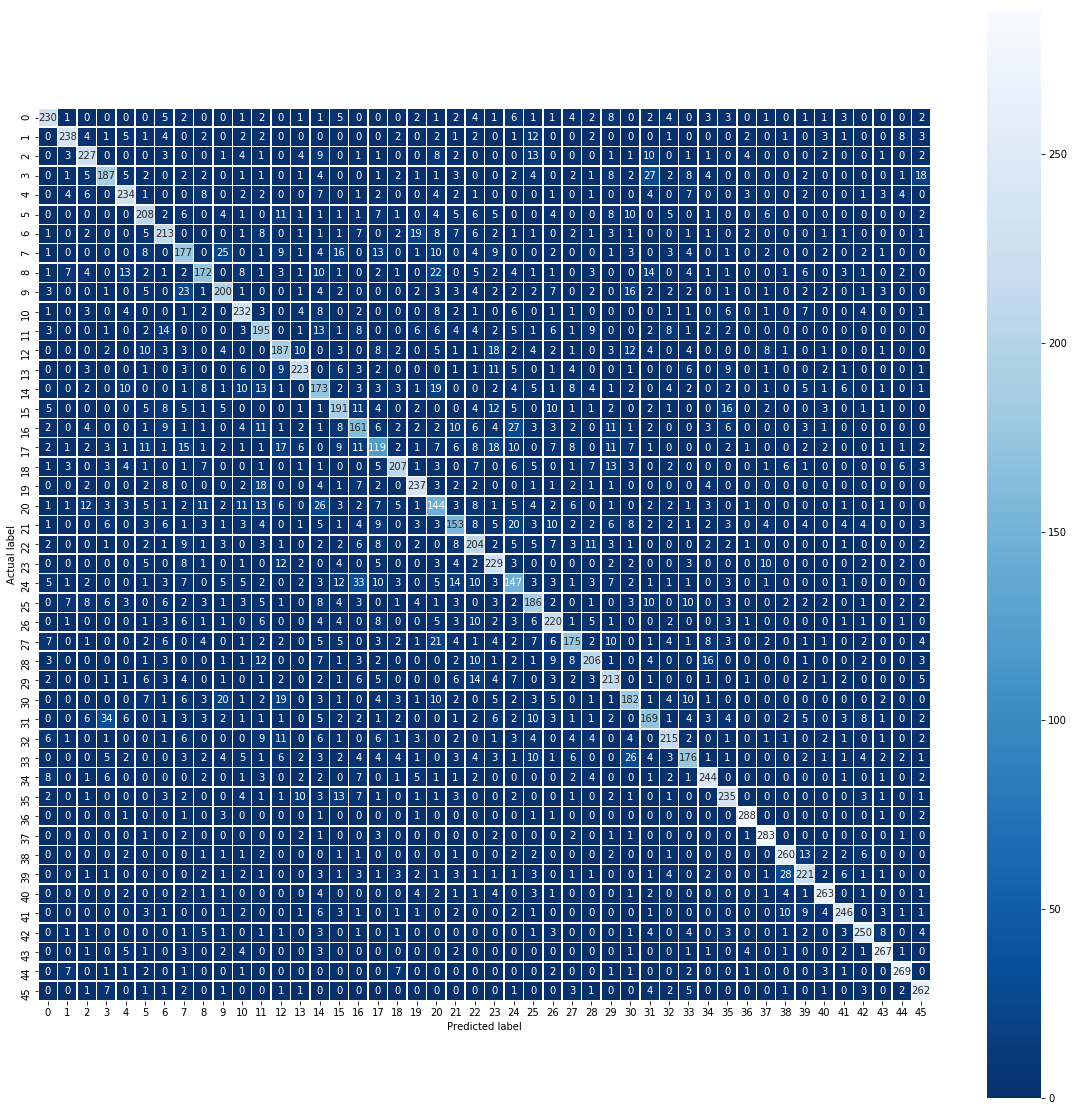

In [17]:
# heatmap of how often predicted label matched actual label
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label')

In [18]:
# Returns a NumPy Array
# Predict for One Observation (image)
model.predict(X_test[0].reshape(1,-1))
yy = model.predict(X_test[0].reshape(1,-1))
print(yy[0])

1


In [19]:
# Predict for Multiple Observations (images) at Once
model.predict(X_test[0:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
# Make predictions on entire test data
predictions = model.predict(X_test)

In [21]:
#how well did the model score?
score = model.score(X_test,y_test)
print(score)

0.704202898551


In [22]:
# Missclassifications
# for the values in test, create list of misclassified indexes
# print how many were misclassified and the first 5
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
print("Number of images misclassified: ",len(misclassifiedIndexes))
print(misclassifiedIndexes[0:5])

Number of images misclassified:  4082
[33, 37, 42, 51, 53]


In [23]:
# round probabilities of X_test predictions to 2 digits
def print_rounded_probabilities(list1):
    class_digit = 0
    for x in list1:
        y = round(x,2)
        print(class_digit,"==>",y)
        class_digit += 1

In [24]:
# Make probabilities on entire test data
probabilities = model.predict_proba(X_test)
print(len(probabilities))
print(probabilities[0])

13800
[  6.39276045e-01   1.15901484e-05   7.27692701e-08   1.39411758e-03
   1.04650474e-06   6.26015093e-04   1.57962970e-04   2.31022576e-03
   3.17336157e-05   3.98680837e-05   1.67555563e-03   3.35118947e-04
   9.28533900e-06   4.11579357e-08   1.16401103e-03   1.58382628e-03
   4.17830731e-04   4.23250861e-04   3.46631237e-05   2.20290464e-01
   4.37880532e-03   1.02670547e-05   6.78003448e-05   4.38171252e-07
   2.79791390e-04   2.03395450e-03   3.37522574e-03   3.77441737e-02
   4.75664752e-04   4.01178533e-02   3.47367047e-05   1.30008035e-02
   1.06205785e-06   8.51820325e-05   1.13094794e-03   2.12906491e-02
   1.87424204e-26   6.67135907e-11   8.28295643e-05   3.46535635e-04
   6.15411387e-06   1.50793777e-05   5.22929468e-06   5.77298721e-09
   4.38323931e-09   5.73408153e-03]


In [25]:
# print probabilities of first test record 
print_rounded_probabilities(probabilities[0])

0 ==> 0.64
1 ==> 0.0
2 ==> 0.0
3 ==> 0.0
4 ==> 0.0
5 ==> 0.0
6 ==> 0.0
7 ==> 0.0
8 ==> 0.0
9 ==> 0.0
10 ==> 0.0
11 ==> 0.0
12 ==> 0.0
13 ==> 0.0
14 ==> 0.0
15 ==> 0.0
16 ==> 0.0
17 ==> 0.0
18 ==> 0.0
19 ==> 0.22
20 ==> 0.0
21 ==> 0.0
22 ==> 0.0
23 ==> 0.0
24 ==> 0.0
25 ==> 0.0
26 ==> 0.0
27 ==> 0.04
28 ==> 0.0
29 ==> 0.04
30 ==> 0.0
31 ==> 0.01
32 ==> 0.0
33 ==> 0.0
34 ==> 0.0
35 ==> 0.02
36 ==> 0.0
37 ==> 0.0
38 ==> 0.0
39 ==> 0.0
40 ==> 0.0
41 ==> 0.0
42 ==> 0.0
43 ==> 0.0
44 ==> 0.0
45 ==> 0.01


In [26]:
print_rounded_probabilities(probabilities[8])
print(y_test[8])

0 ==> 0.76
1 ==> 0.0
2 ==> 0.0
3 ==> 0.04
4 ==> 0.0
5 ==> 0.0
6 ==> 0.0
7 ==> 0.02
8 ==> 0.0
9 ==> 0.0
10 ==> 0.0
11 ==> 0.0
12 ==> 0.0
13 ==> 0.0
14 ==> 0.01
15 ==> 0.0
16 ==> 0.0
17 ==> 0.0
18 ==> 0.0
19 ==> 0.12
20 ==> 0.0
21 ==> 0.0
22 ==> 0.0
23 ==> 0.0
24 ==> 0.0
25 ==> 0.01
26 ==> 0.0
27 ==> 0.03
28 ==> 0.0
29 ==> 0.0
30 ==> 0.0
31 ==> 0.0
32 ==> 0.0
33 ==> 0.0
34 ==> 0.01
35 ==> 0.0
36 ==> 0.0
37 ==> 0.0
38 ==> 0.0
39 ==> 0.0
40 ==> 0.0
41 ==> 0.0
42 ==> 0.0
43 ==> 0.0
44 ==> 0.0
45 ==> 0.0
1


In [27]:
print_rounded_probabilities(probabilities[33])
print(y_test[33])

0 ==> 0.08
1 ==> 0.0
2 ==> 0.0
3 ==> 0.01
4 ==> 0.0
5 ==> 0.0
6 ==> 0.0
7 ==> 0.0
8 ==> 0.0
9 ==> 0.0
10 ==> 0.0
11 ==> 0.03
12 ==> 0.0
13 ==> 0.0
14 ==> 0.01
15 ==> 0.0
16 ==> 0.0
17 ==> 0.0
18 ==> 0.01
19 ==> 0.78
20 ==> 0.0
21 ==> 0.0
22 ==> 0.0
23 ==> 0.0
24 ==> 0.0
25 ==> 0.0
26 ==> 0.0
27 ==> 0.04
28 ==> 0.0
29 ==> 0.0
30 ==> 0.0
31 ==> 0.0
32 ==> 0.0
33 ==> 0.0
34 ==> 0.03
35 ==> 0.0
36 ==> 0.0
37 ==> 0.0
38 ==> 0.0
39 ==> 0.0
40 ==> 0.0
41 ==> 0.0
42 ==> 0.0
43 ==> 0.0
44 ==> 0.0
45 ==> 0.0
1


In [28]:
# save the model to disk
import pickle
filename = 'devanagari_logreg.pkl'
pickle.dump(model, open(filename, 'wb'))

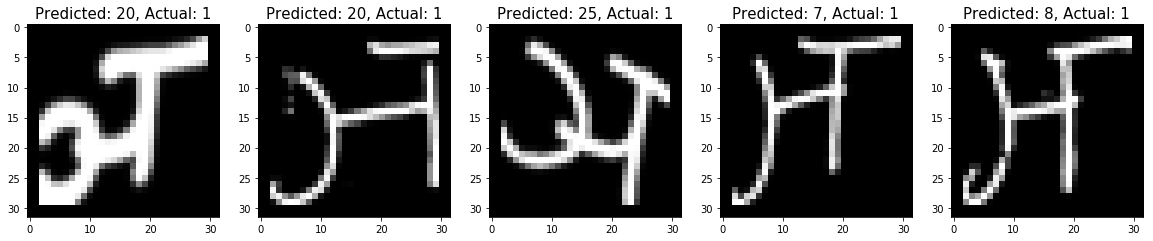

In [29]:
# show the first 5 misclassified images
# plt.figure(figsize=(width",height"))
# enumerate 2 lists equal length simultaneously: enumerate(zip
# subplot (nrows, ncols, index) - plot within plot where index is the placement
# imshow (array(m,n scalar), cmap=colormap)

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (32,32)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

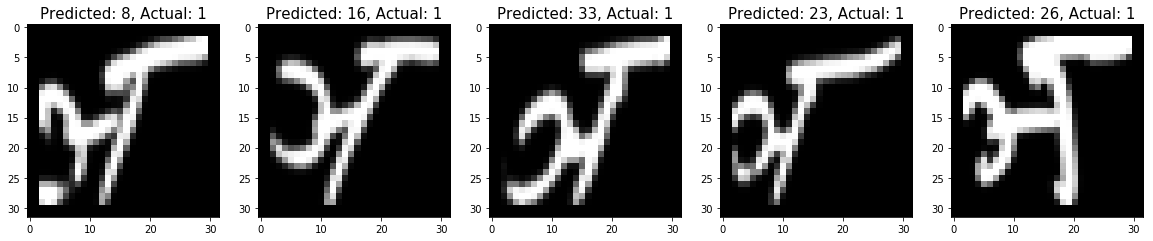

In [30]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[5:10]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (32,32)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

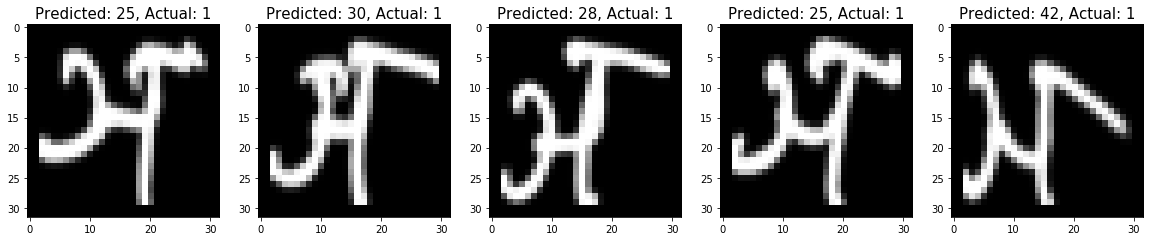

In [31]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[11:16]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (32,32)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [32]:
# Done with X_test, y_test, predictions,misclassifiedIndexes
del [[X_test,y_test,predictions,misclassifiedIndexes]]
gc.collect()

32475